# Step 1: Select a Dataset (10 Marks)

Choose a dataset from Kaggle or any other open-source platform.

Ensure the dataset has sufficient features and a well-defined target variable.

1) (5 Marks): Proper dataset selection (relevant to classification or regression).
2) (5 Marks): Successfully loading the dataset into Python (Pandas).

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Step 2: Data Cleaning (20 Marks)

Handle missing values (remove or impute missing data appropriately).

Check for and remove duplicates, if applicable.

Ensure proper formatting and structure for further analysis.
    
1) (10 Marks): Identifying and handling missing values correctly.
2) (5 Marks): Cleaning data effectively and providing justification.
3) (5 Marks): Ensuring the dataset is properly structured and ready for modeling.

Handle missing values 

1)Checking For The Number Of Missing Values In Each Columns

In [194]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

2)Dropping The Unnecessary Columns, Showing The Existing Columns After The Changes

In [197]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
data.columns.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

3)Impute Missing 'Fare'

In [200]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

4)Impute Missing 'Age'

In [203]:
data['Age'] = data['Age'].fillna(data['Age'].median())

5)Checking For The New Changes

In [206]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Check for and remove duplicates

1)Check If There Is Any Duplicated Data In The Dataset

In [210]:
data.duplicated().sum()

41

In [212]:
# Showing duplicate rows
print(data[data.duplicated(keep=False)])

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
3           0       3    male  27.0      0      0   8.6625        S
10          0       3    male  27.0      0      0   7.8958        S
29          0       3    male  27.0      2      0  21.6792        C
36          1       3  female  27.0      0      0   8.0500        S
41          0       1    male  27.0      0      0  26.5500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
363         0       3    male  27.0      0      0   8.6625        S
380         0       3    male  27.0      0      0   7.7500        Q
410         1       3  female  27.0      0      0   7.7500        Q
413         0       3    male  27.0      0      0   8.0500        S
416         0       3    male  27.0      0      0   8.0500        S

[61 rows x 8 columns]


In [214]:
# Removing duplicates
data = data.drop_duplicates()

In [216]:
# Verifying the result
print(data.duplicated().sum())  

0


In [218]:
#reseting 
data = data.reset_index(drop=True)

In [220]:
# Verifying the result
print("Number of duplicates after removal:", data.duplicated().sum())
print("Shape after removing duplicates:", data.shape)

Number of duplicates after removal: 0
Shape after removing duplicates: (377, 8)


Ensure proper formatting and structure 

1)Converting 'Sex' and 'Embarked' To Binary & Category values

In [224]:
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
data["Embarked"] = data["Embarked"].astype("category")

In [226]:
data.columns.to_list()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [228]:
data.dtypes

Survived       int64
Pclass         int64
Sex            int64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

# Step 3:Exploratory Data Analysis (EDA) & Visualization (20 Marks)

Visualize important features using graphs (e.g., histograms, scatter plots, bar charts).

Generate a correlation heatmap (if applicable).

Extract and explain 3-5 key insights from the dataset.

(10 Marks): Clear and informative visualizations.

(10 Marks): Well-explained insights based on the visualizations.

1) Histograms to understand the 'Age Distribution'

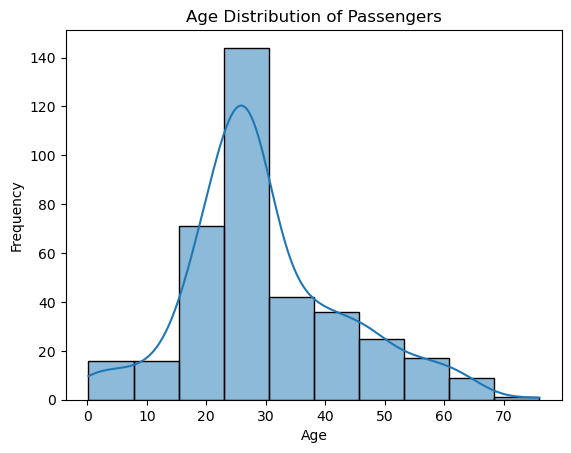

In [230]:
sns.histplot(data['Age'], bins=10,kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insight: From the graph, we can say that most passengers were between 20 and 40 years old. 

2. Scatter plots help visualize relationships between two numerical variable,'Sex' and 'Survived'.

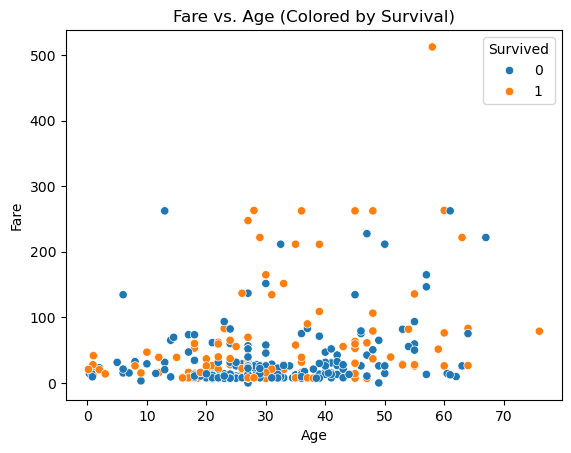

In [233]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Fare vs. Age (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()

Insights: Passengers who paid higher fares (likely in higher classes) had a better chance of survival.
          Younger passengers (children) had a higher survival rate.

3. Bar chart for showing the survival count by Passenger Class

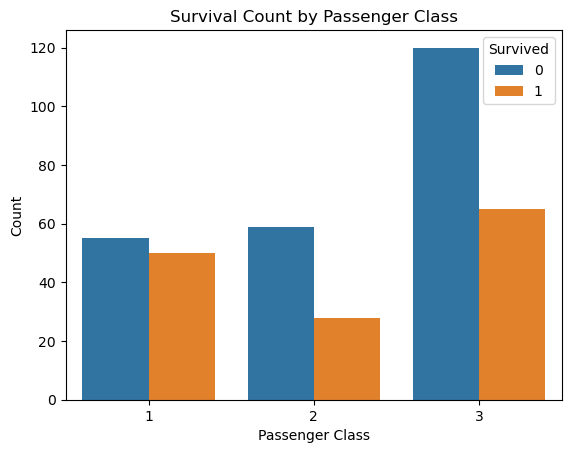

In [235]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

Insights: 1st class passengers had the highest chance of survival,while the 3rd class passengers had the lowest chance of survival. Also, the female passengers had the more chances to survive among the passengers.

4) Generating a corelation heatmap

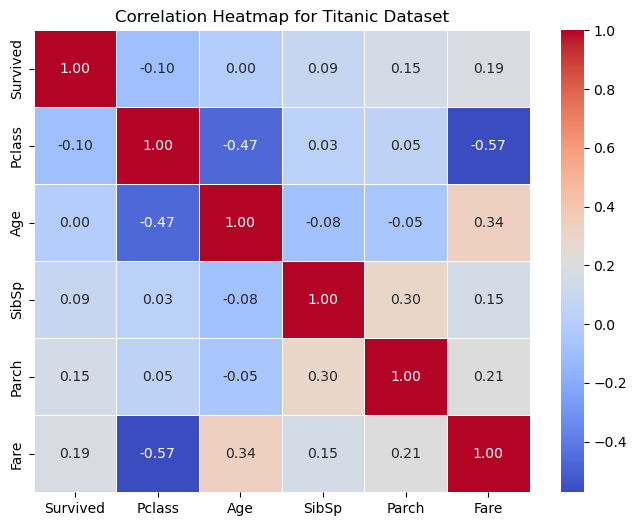

In [237]:
#Calculating the numerical data
numerical_data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
corr = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Titanic Dataset')
plt.show()

Insights:1)Row 1: Survived: Negatively corelated with PClass,refers to Lower class passengers had slightly lower survival rates
         2)Row 2: PClass: Higher-class passengers (lower Pclass values) paid higher fares.
         3)Row 3: Age: Age is moderately correlated with Fare
         4)Row 4: SibSp: Mostly Correlated with Parch
         5)Row 5: Parch: Lager famiies tend to pay higher fair.
         6)Row 6: Fare: Older passengers tend to pay higher fair.

# Step 4: Apply a Machine Learning Model (30 Marks)

Choose and apply either a Regression or Classification model:
1) If the target variable is numerical → Linear Regression.
2) If the target variable is categorical → Logistic Regression or another classification model.

Train the model using Scikit-learn.

Display and interpret the accuracy score (for classification) or RMSE (for regression).

1) (10 Marks): Correct model selection based on dataset type.
2) (10 Marks): Implementing and training the model properly.
3) (10 Marks): Displaying and correctly interpreting accuracy/RMSE.

In [239]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



# Select features and target
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']




# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Calculating the accuracy, confusion matrix, and classification report for my Logistic Regression model.

In [241]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Classification Report:")
print(class_report)

Accuracy: 0.6578947368421053
Confusion Matrix:
[[50  1]
 [25  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.98      0.79        51
           1       0.00      0.00      0.00        25

    accuracy                           0.66        76
   macro avg       0.33      0.49      0.40        76
weighted avg       0.45      0.66      0.53        76



# Step 5: Conclusion & Future Improvements (20 Marks)

Summarize findings and discuss model performance.

Suggest at least two possible improvements (e.g., using more data, trying a different model, feature engineering).

(10 Marks): Well-explained summary of findings.


(10 Marks): Thoughtful suggestions for improvement.

## Summarizing findings and discussing about the model performance.

The model achieved an accuracy of 65.79% on the test set. The classification report revealed: s.s (1).

Precision: 67% for non-survivors (0) and 0% for survivors (1).

Recall: 98% for non-survivors (0) and 0% for survivors (1).

F1-Score: 0.79 for non-survivors (0) and 0.00 for survivors (1).

So we can say that the model performs well in predicting non-survivors (0) with high recall (98%) but fails completely in predicting survivors (1), as indicated by 0% precision, recall, and F1-score for class 1.

The model is heavily biased toward predicting non-survivors, which suggests a class imbalance issue or insufficient feature representation for survivors

## Future Improvements

1: Trying a Different Model:
Logistic Regression may not be capturing the complexity of the data. Experiment with more advanced models like Random Forest, Gradient Boosting (e.g., XGBoost, LightGBM), or Neural Networks.

2: Hyperparameter Tuning: Optimize model hyperparameters using GridSearchCV or RandomizedSearchCV.